<a href="https://colab.research.google.com/github/saleem7369/Fuel/blob/main/Grid_Stability_Prediction_Gulfraz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: mount file

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: display data here

import pandas as pd

# Assuming your data is in a CSV file named 'your_data.csv' in your Google Drive
# Replace 'your_data.csv' with the actual path to your file
file_path = '/content/drive/MyDrive/Colab Notebooks/Gulfraz+Ali+Irtaza/Gulfraz/smart_grid_stability.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)  # This line is added to load the data

df.head()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,-0.835374,-0.791316,1.141704,1.652104,0.017392,1.079404,-0.017078,-1.092544,0.457467,1.220013,1.321628,1.579026,1.073120,unstable
1,1.478297,-0.126705,-0.803110,-1.415046,1.752145,-1.593619,-1.438158,-0.011575,-0.406791,1.230355,0.135424,0.936255,-0.587487,stable
2,1.357093,1.312139,-0.803497,-1.471507,-0.458504,0.098252,-0.062839,0.760964,-1.319852,0.881299,1.146596,-1.513803,-0.332095,unstable
3,-1.653138,0.882288,-0.278353,-1.060904,0.284249,0.513903,-1.591046,0.583415,-0.287304,1.647250,1.474543,-0.591751,0.355922,unstable
4,-0.771543,0.860108,-0.111668,1.680116,-0.298085,0.287448,-1.376343,1.606636,0.992226,-0.253610,0.481133,1.079062,0.924487,unstable


In [ ]:
# prompt: now write code to change stabf olumn values in o 1

# Replace 'stabf' with the actual column name if it's different
# Replace 0 and 1 with the values you want to map to
df['stabf'] = df['stabf'].map({'stable': 1, 'unstable': 0})

df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,-0.835374,-0.791316,1.141704,1.652104,0.017392,1.079404,-0.017078,-1.092544,0.457467,1.220013,1.321628,1.579026,1.073120,0
1,1.478297,-0.126705,-0.803110,-1.415046,1.752145,-1.593619,-1.438158,-0.011575,-0.406791,1.230355,0.135424,0.936255,-0.587487,1
2,1.357093,1.312139,-0.803497,-1.471507,-0.458504,0.098252,-0.062839,0.760964,-1.319852,0.881299,1.146596,-1.513803,-0.332095,0
3,-1.653138,0.882288,-0.278353,-1.060904,0.284249,0.513903,-1.591046,0.583415,-0.287304,1.647250,1.474543,-0.591751,0.355922,0
4,-0.771543,0.860108,-0.111668,1.680116,-0.298085,0.287448,-1.376343,1.606636,0.992226,-0.253610,0.481133,1.079062,0.924487,0


In [ ]:
# Display the first 5 rows
print("First 5 rows:")
print(df.head())

First 5 rows:
       tau1      tau2      tau3      tau4        p1        p2        p3  \
0 -0.835374 -0.791316  1.141704  1.652104  0.017392  1.079404 -0.017078   
1  1.478297 -0.126705 -0.803110 -1.415046  1.752145 -1.593619 -1.438158   
2  1.357093  1.312139 -0.803497 -1.471507 -0.458504  0.098252 -0.062839   
3 -1.653138  0.882288 -0.278353 -1.060904  0.284249  0.513903 -1.591046   
4 -0.771543  0.860108 -0.111668  1.680116 -0.298085  0.287448 -1.376343   

         p4        g1        g2        g3        g4      stab  stabf  
0 -1.092544  0.457467  1.220013  1.321628  1.579026  1.073120      0  
1 -0.011575 -0.406791  1.230355  0.135424  0.936255 -0.587487      1  
2  0.760964 -1.319852  0.881299  1.146596 -1.513803 -0.332095      0  
3  0.583415 -0.287304  1.647250  1.474543 -0.591751  0.355922      0  
4  1.606636  0.992226 -0.253610  0.481133  1.079062  0.924487      0  


In [ ]:
# Display the last 5 rows
print("\nLast 5 rows:")
print(df.tail())


Last 5 rows:
           tau1      tau2      tau3      tau4        p1        p2        p3  \
59995 -0.845823 -1.047791  1.545217  0.341960 -0.540596 -0.459814  1.367040   
59996 -0.677397 -0.836873 -1.449516  0.599748  0.797101  0.687190 -0.955307   
59997 -1.052346  1.285871 -0.878048 -1.546482  0.731237  0.706943 -0.301881   
59998  1.597686 -0.909027 -0.457846  0.937622 -1.642376  1.385835  0.655108   
59999  0.466935 -0.328289  0.558555  1.248221 -0.341966 -0.651695 -0.323975   

             p4        g1        g2        g3        g4      stab  stabf  
59995  0.031739  0.279714  1.052035  0.928533  0.304055  0.221054      0  
59996 -1.116396 -0.083579 -0.871935  0.154031 -0.579345 -1.125067      1  
59997 -1.675174 -0.135508 -1.370012  1.682844 -1.382054 -1.287768      1  
59998  0.811729 -0.582529  1.327730  0.228111  1.069829  0.597497      0  
59999  1.569630 -1.647977 -0.533251 -0.071321  1.522859  0.799964      0  


In [ ]:
# Display the number of rows and columns
print("\nNumber of rows and columns:")
print(df.shape)


Number of rows and columns:
(60000, 14)


In [ ]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,-0.835374,-0.791316,1.141704,1.652104,0.017392,1.079404,-0.017078,-1.092544,0.457467,1.220013,1.321628,1.579026,1.073120,0
1,1.478297,-0.126705,-0.803110,-1.415046,1.752145,-1.593619,-1.438158,-0.011575,-0.406791,1.230355,0.135424,0.936255,-0.587487,1
2,1.357093,1.312139,-0.803497,-1.471507,-0.458504,0.098252,-0.062839,0.760964,-1.319852,0.881299,1.146596,-1.513803,-0.332095,0
3,-1.653138,0.882288,-0.278353,-1.060904,0.284249,0.513903,-1.591046,0.583415,-0.287304,1.647250,1.474543,-0.591751,0.355922,0
4,-0.771543,0.860108,-0.111668,1.680116,-0.298085,0.287448,-1.376343,1.606636,0.992226,-0.253610,0.481133,1.079062,0.924487,0


**Preprocessing**

Understand the Dataset
Inspect the data: Look at summary statistics (mean, median, std) and check for distributions of features.
Identify whether the target (stabf) is binary or multi-class.


In [ ]:
# prompt: Understand the Dataset
# Inspect the data: Look at summary statistics (mean, median, std) and check for distributions of features.
# Identify whether the target (stabf) is binary or multi-class.

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for data types of each column
print("\nData types:")
print(df.dtypes)

# Check the distribution of the target variable 'stabf'
print("\nDistribution of 'stabf':")
print(df['stabf'].value_counts())

# Identify whether the target variable is binary or multi-class
if len(df['stabf'].unique()) == 2:
    print("\nThe target variable 'stabf' is binary.")
else:
    print("\nThe target variable 'stabf' is multi-class.")


Summary statistics:
               tau1          tau2          tau3          tau4            p1  \
count  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04   
mean   1.036208e-17  2.042810e-17  1.749711e-17  1.728987e-17 -1.219765e-17   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00   
min   -1.731763e+00 -1.731999e+00 -1.731999e+00 -1.731999e+00 -2.829216e+00   
25%   -8.660657e-01 -8.660215e-01 -8.660215e-01 -8.660215e-01 -7.069488e-01   
50%    1.437170e-06 -7.028730e-06 -7.028730e-06 -7.028730e-06  1.358212e-03   
75%    8.659131e-01  8.659873e-01  8.659873e-01  8.659873e-01  7.078957e-01   
max    1.731859e+00  1.731991e+00  1.731991e+00  1.731991e+00  2.811305e+00   

                 p2            p3            p4            g1            g2  \
count  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04   
mean  -6.898186e-18 -2.001362e-17 -7.342275e-18  1.373716e-17 -3.907985e-18   
std    1.000008e+00  1.000008e

Handle Missing Values

In [ ]:
# prompt: Handle Missing Values

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Handle missing values (example: fill with mean for numerical features)
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Handle missing values (example: fill with mode for categorical features)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify if missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values:
tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

Missing values after handling:
tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64


Handle Outliers
Use boxplots, z-scores, or the IQR method to detect outliers in numerical features like tau1, tau2, ..., stab.
Decide whether to:
Remove extreme outliers (if they're errors or noise).
Apply transformations (e.g., log, square root, etc.) to reduce their impact.
Action: Identify and address outliers.

Outliers in 'tau1' using Z-score method: 0
Outliers in 'tau2' using Z-score method: 0
Outliers in 'tau3' using Z-score method: 0
Outliers in 'tau4' using Z-score method: 0
Outliers in 'p1' using Z-score method: 0
Outliers in 'p2' using Z-score method: 0
Outliers in 'p3' using Z-score method: 0
Outliers in 'p4' using Z-score method: 0
Outliers in 'g1' using Z-score method: 0
Outliers in 'g2' using Z-score method: 0
Outliers in 'g3' using Z-score method: 0
Outliers in 'g4' using Z-score method: 0
Outliers in 'stab' using Z-score method: 0
Outliers in 'tau1' using IQR method: 0
Outliers in 'tau2' using IQR method: 0
Outliers in 'tau3' using IQR method: 0
Outliers in 'tau4' using IQR method: 0
Outliers in 'p1' using IQR method: 0
Outliers in 'p2' using IQR method: 0
Outliers in 'p3' using IQR method: 0
Outliers in 'p4' using IQR method: 0
Outliers in 'g1' using IQR method: 0
Outliers in 'g2' using IQR method: 0
Outliers in 'g3' using IQR method: 0
Outliers in 'g4' using IQR method: 0
Outli

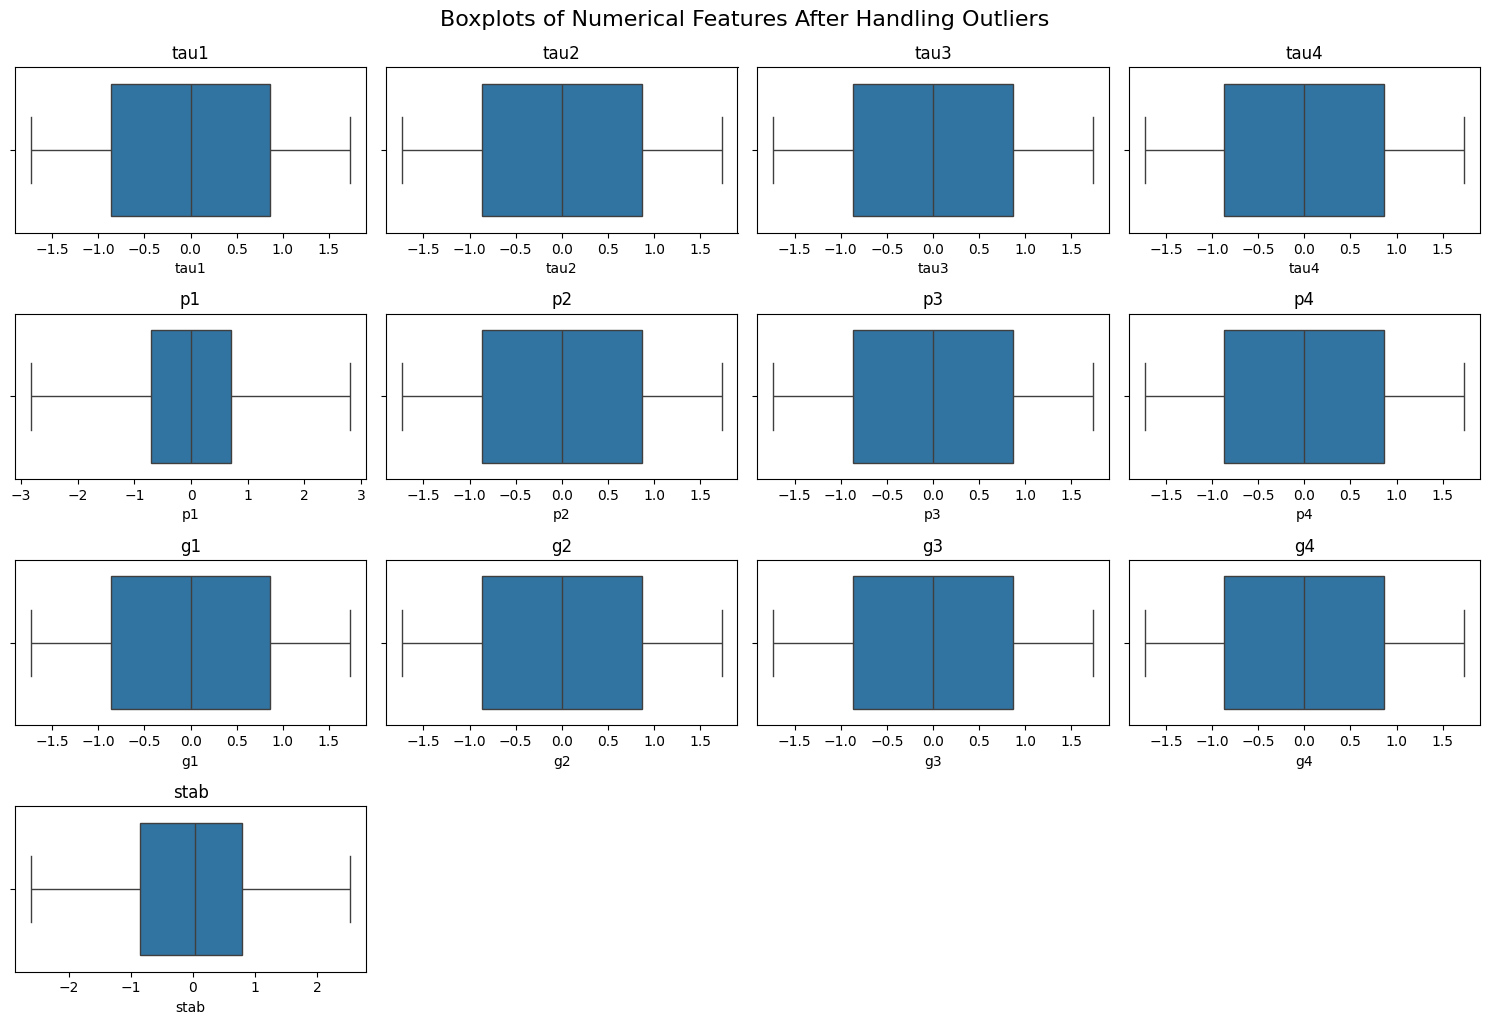

Cleaned dataset saved to /content/drive/MyDrive/Colab Notebooks/Gulfraz+Ali+Irtaza/Gulfraz/smart_grid_stability.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Gulfraz+Ali+Irtaza/Gulfraz/smart_grid_stability.xlsx'
data = pd.read_excel(file_path)

# Identify numerical features
numerical_features = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab']

# Handle outliers using Z-score
z_threshold = 3
for feature in numerical_features:
    z_scores = np.abs((data[feature] - data[feature].mean()) / data[feature].std())
    outliers = data[z_scores > z_threshold]
    print(f"Outliers in '{feature}' using Z-score method: {len(outliers)}")

    # Option to cap outliers
    upper_limit = data[feature].mean() + z_threshold * data[feature].std()
    lower_limit = data[feature].mean() - z_threshold * data[feature].std()
    data[feature] = np.clip(data[feature], lower_limit, upper_limit)

# Handle outliers using IQR method
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"Outliers in '{feature}' using IQR method: {len(outliers_iqr)}")

    # Option to cap outliers
    data[feature] = np.clip(data[feature], lower_bound, upper_bound)

# Visualize cleaned data with boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=data[feature])
    plt.title(feature)
    plt.tight_layout()

plt.suptitle("Boxplots of Numerical Features After Handling Outliers", fontsize=16, y=1.02)
plt.show()

# Save cleaned dataset
cleaned_file_path = '/content/drive/MyDrive/Colab Notebooks/Gulfraz+Ali+Irtaza/Gulfraz/smart_grid_stability.xlsx'
data.to_excel(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")


4. Normalize/Standardize Numerical Features
Scale features (tau1, tau2, ..., stab) to ensure they are on the same scale.
Algorithms like SVM, Logistic Regression, and Neural Networks benefit from scaled data.
Options:

Standardization (mean=0, std=1): Recommended for most models.
Normalization (0-1 scaling): Suitable for neural networks or distance-based algorithms like KNN.
Action: Apply feature scaling.

In [ ]:
# prompt: Normalize/Standardize Numerical Features
# Scale features (tau1, tau2, ..., stab) to ensure they are on the same scale.
# Algorithms like SVM, Logistic Regression, and Neural Networks benefit from scaled data.
# Options:
# Standardization (mean=0, std=1): Recommended for most models.
# Normalization (0-1 scaling): Suitable for neural networks or distance-based algorithms like KNN.
# Action: Apply feature scaling.

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming 'data' DataFrame from the previous code block
features_to_scale = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'stab']

# Choose scaling method (Standardization is generally preferred)
scaler = StandardScaler()  # Or MinMaxScaler() for normalization

# Fit and transform the selected features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Now the features are scaled
print(data.head())

# Save the scaled data (optional)
scaled_file_path = '/content/drive/MyDrive/Colab Notebooks/Gulfraz+Ali+Irtaza/Gulfraz/smart_grid_stability.xlsx'
data.to_excel(scaled_file_path, index=False)
print(f"Scaled dataset saved to {scaled_file_path}")

       tau1      tau2      tau3      tau4        p1        p2        p3  \
0 -0.835374 -0.791316  1.141704  1.652104  0.017392  1.079404 -0.017078   
1  1.478297 -0.126705 -0.803110 -1.415046  1.752145 -1.593619 -1.438158   
2  1.357093  1.312139 -0.803497 -1.471507 -0.458504  0.098252 -0.062839   
3 -1.653138  0.882288 -0.278353 -1.060904  0.284249  0.513903 -1.591046   
4 -0.771543  0.860108 -0.111668  1.680116 -0.298085  0.287448 -1.376343   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.092544  0.457467  1.220013  1.321628  1.579026  1.073120  unstable  
1 -0.011575 -0.406791  1.230355  0.135424  0.936255 -0.587487    stable  
2  0.760964 -1.319852  0.881299  1.146596 -1.513803 -0.332095  unstable  
3  0.583415 -0.287304  1.647250  1.474543 -0.591751  0.355922  unstable  
4  1.606636  0.992226 -0.253610  0.481133  1.079062  0.924487  unstable  
Scaled dataset saved to /content/drive/MyDrive/Colab Notebooks/Gulfraz+Ali+Irtaza/Gulfraz/smart_grid_stab

Feature Selection
Use correlation analysis (Pearson/Spearman) or feature importance methods (e.g., tree-based models) to identify:
Redundant features (e.g., highly correlated pairs like p1 and p2).
Irrelevant features that don’t contribute significantly to stabf.
Action:

Drop or transform redundant features.
Keep only features strongly correlated with the target.

In [ ]:
# prompt: Feature Selection
# Use correlation analysis (Pearson/Spearman) or feature importance methods (e.g., tree-based models) to identify:
# Redundant features (e.g., highly correlated pairs like p1 and p2).
# Irrelevant features that don’t contribute significantly to stabf.
# Action:
# Drop or transform redundant features.
# Keep only features strongly correlated with the target.

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the scaled data
scaled_file_path = '/content/drive/MyDrive/Colab Notebooks/Gulfraz+Ali+Irtaza/Gulfraz/scaled_smart_grid_stability.xlsx'
data = pd.read_excel(scaled_file_path)

# Separate features (X) and target (y)
X = data.drop('stabf', axis=1)  # Assuming 'stabf' is the target variable
y = data['stabf']

# Use Random Forest for feature importance
rf_model = RandomForestClassifier(random_state=42)  # You can tune hyperparameters
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Identify and remove low importance features (example threshold)
threshold = 0.01
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
X_selected = X[important_features]

print("\nSelected features:")
X_selected.columns

# Further analysis (correlation, etc.) can be performed on X_selected

   Feature  Importance
12    stab    0.771263
0     tau1    0.041406
1     tau2    0.038187
3     tau4    0.035985
2     tau3    0.032009
8       g1    0.019353
10      g3    0.019327
9       g2    0.018998
11      g4    0.018654
4       p1    0.001469
7       p4    0.001164
6       p3    0.001108
5       p2    0.001077

Selected features:


Index(['stab', 'tau1', 'tau2', 'tau4', 'tau3', 'g1', 'g3', 'g2', 'g4'], dtype='object')

   Feature  Importance
12    stab    0.771263
0     tau1    0.041406
1     tau2    0.038187
3     tau4    0.035985
2     tau3    0.032009
8       g1    0.019353
10      g3    0.019327
9       g2    0.018998
11      g4    0.018654
4       p1    0.001469
7       p4    0.001164
6       p3    0.001108
5       p2    0.001077

Selected features:


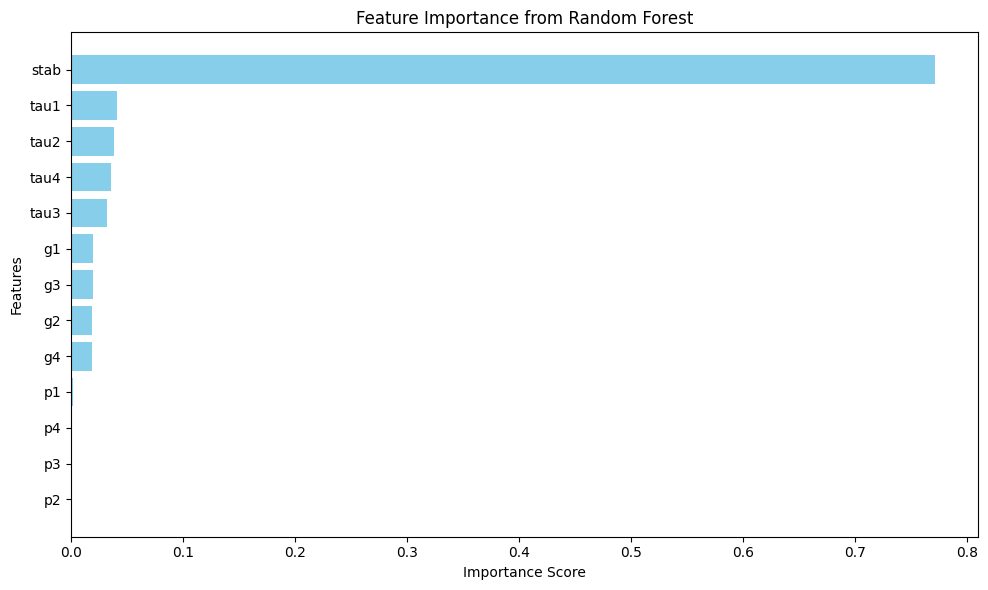

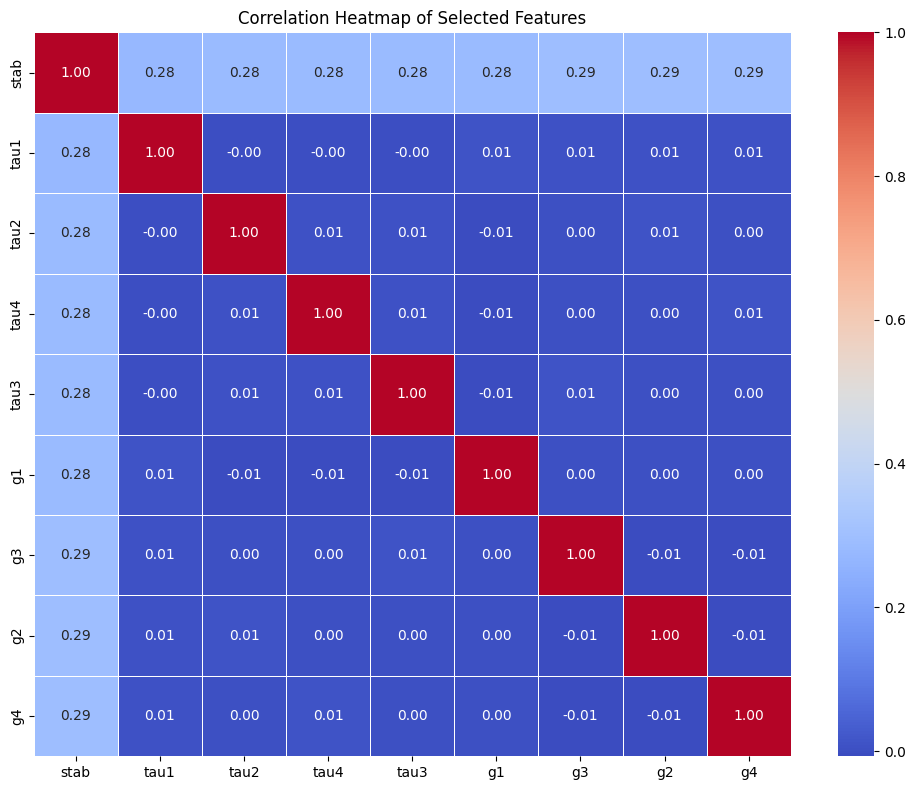

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Load the scaled data
scaled_file_path = '/content/drive/MyDrive/Colab Notebooks/Gulfraz+Ali+Irtaza/Gulfraz/scaled_smart_grid_stability.xlsx'
data = pd.read_excel(scaled_file_path)

# Separate features (X) and target (y)
X = data.drop('stabf', axis=1)  # Assuming 'stabf' is the target variable
y = data['stabf']

# Use Random Forest for feature importance
rf_model = RandomForestClassifier(random_state=42)  # You can tune hyperparameters
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Identify and remove low importance features (example threshold)
threshold = 0.01
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
X_selected = X[important_features]

print("\nSelected features:")
X_selected.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

# Correlation heatmap for selected features
correlation_matrix = X_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()


Handle Class Imbalance
Check the class distribution of stabf.
If imbalanced:
Use SMOTE (Synthetic Minority Oversampling Technique) to oversample the minority class.
Or, undersample the majority class.
Action: Balance the dataset if needed.

Class distribution before balancing:
stabf
unstable    38280
stable      21720
Name: count, dtype: int64


/tmp/ipython-input-3845063956.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


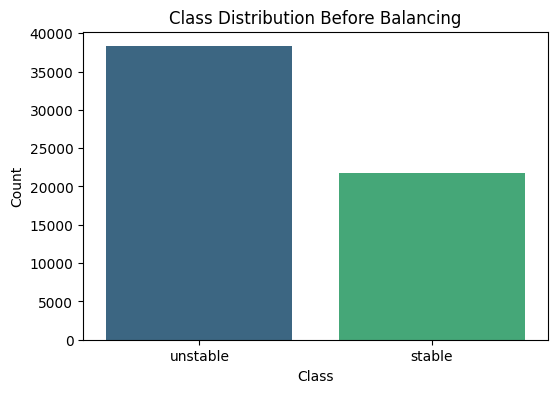

Class distribution after balancing:
stabf
unstable    38280
stable      38280
Name: count, dtype: int64


/tmp/ipython-input-3845063956.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resampled_class_counts.index, y=resampled_class_counts.values, palette='viridis')


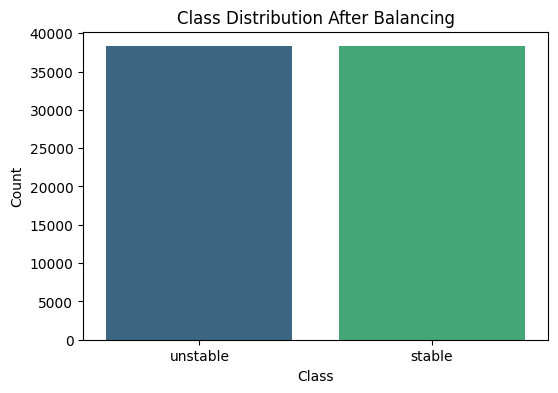

Dataset has been balanced using SMOTE.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Load the scaled data
scaled_file_path = '/content/drive/MyDrive/Colab Notebooks/Gulfraz+Ali+Irtaza/Gulfraz/scaled_smart_grid_stability.xlsx'
data = pd.read_excel(scaled_file_path)

# Separate features (X) and target (y)
X = data.drop('stabf', axis=1)  # Assuming 'stabf' is the target variable
y = data['stabf']

# Check class distribution
class_counts = y.value_counts()
print("Class distribution before balancing:")
print(class_counts)

# Plot class distribution before balancing
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after balancing
resampled_class_counts = pd.Series(y_resampled).value_counts()
print("Class distribution after balancing:")
print(resampled_class_counts)

# Plot class distribution after balancing
plt.figure(figsize=(6, 4))
sns.barplot(x=resampled_class_counts.index, y=resampled_class_counts.values, palette='viridis')
plt.title('Class Distribution After Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Continue with further processing or modeling as needed
print("Dataset has been balanced using SMOTE.")


In [ ]:
# prompt: write code to split 70% for training  and 30% fro testing

from sklearn.model_selection import train_test_split

# Assuming X_resampled and y_resampled are from the previous code
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Now you have X_train, X_test, y_train, y_test for training and testing
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (53592, 13)
Testing data shape: (22968, 13)


In [ ]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,-0.835374,-0.791316,1.141704,1.652104,0.017392,1.079404,-0.017078,-1.092544,0.457467,1.220013,1.321628,1.579026,1.073120,0
1,1.478297,-0.126705,-0.803110,-1.415046,1.752145,-1.593619,-1.438158,-0.011575,-0.406791,1.230355,0.135424,0.936255,-0.587487,1
2,1.357093,1.312139,-0.803497,-1.471507,-0.458504,0.098252,-0.062839,0.760964,-1.319852,0.881299,1.146596,-1.513803,-0.332095,0
3,-1.653138,0.882288,-0.278353,-1.060904,0.284249,0.513903,-1.591046,0.583415,-0.287304,1.647250,1.474543,-0.591751,0.355922,0
4,-0.771543,0.860108,-0.111668,1.680116,-0.298085,0.287448,-1.376343,1.606636,0.992226,-0.253610,0.481133,1.079062,0.924487,0


Class Distribution:
stabf
unstable    38280
stable      38280
Name: count, dtype: int64


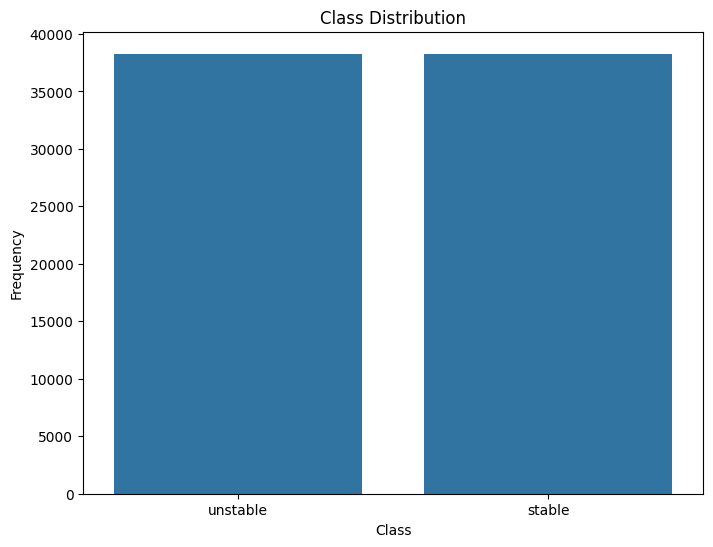


Class Percentages:


,count
stabf,
unstable,50.0
stable,50.0


In [ ]:
# prompt: write a code for class distribution

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame from the previous code block (after SMOTE)
# ... (your existing code to load and preprocess the data) ...

# Check class distribution after balancing (if you've already done SMOTE)
class_counts = y_resampled.value_counts() # Use y_resampled if SMOTE is applied
print("Class Distribution:")
print(class_counts)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled) # Use y_resampled if SMOTE is applied
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the percentage of each class
class_percentages = (y_resampled.value_counts() / len(y_resampled)) * 100
print("\nClass Percentages:")
class_percentages

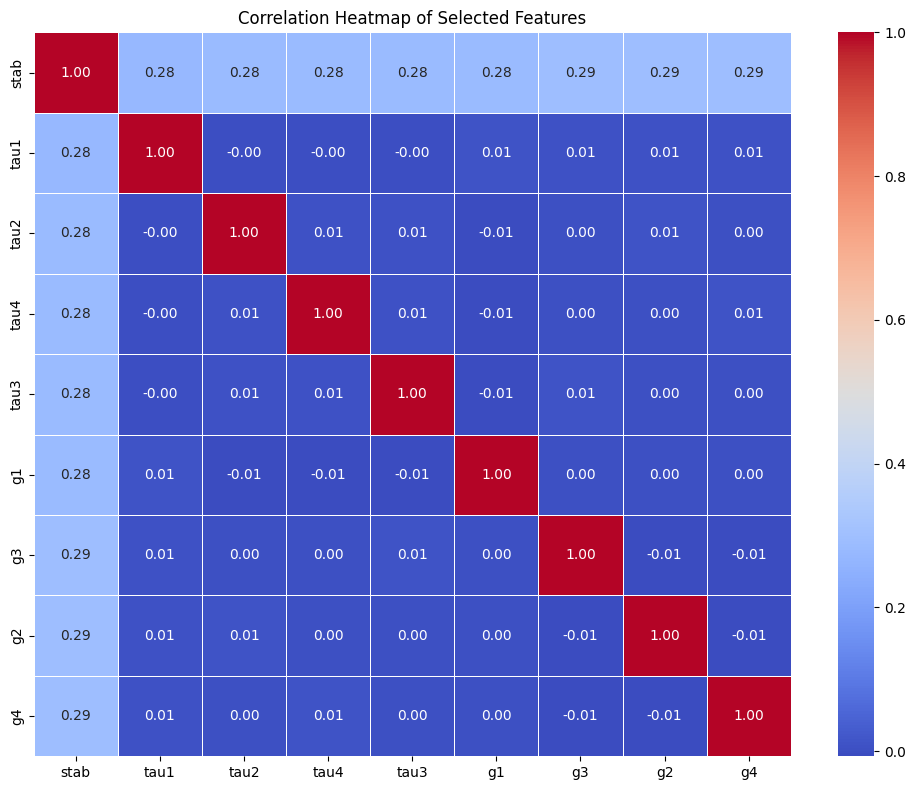

In [ ]:
# prompt: correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_selected is the DataFrame with selected features
# ... (your existing code to load and preprocess the data, including feature selection) ...


# Correlation heatmap for selected features
correlation_matrix = X_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

/tmp/ipython-input-510242643.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_data['stabf'] = pd.to_numeric(full_data['stabf'].replace({'stable': 1, 'unstable': 0}), errors='coerce').astype('Int64')


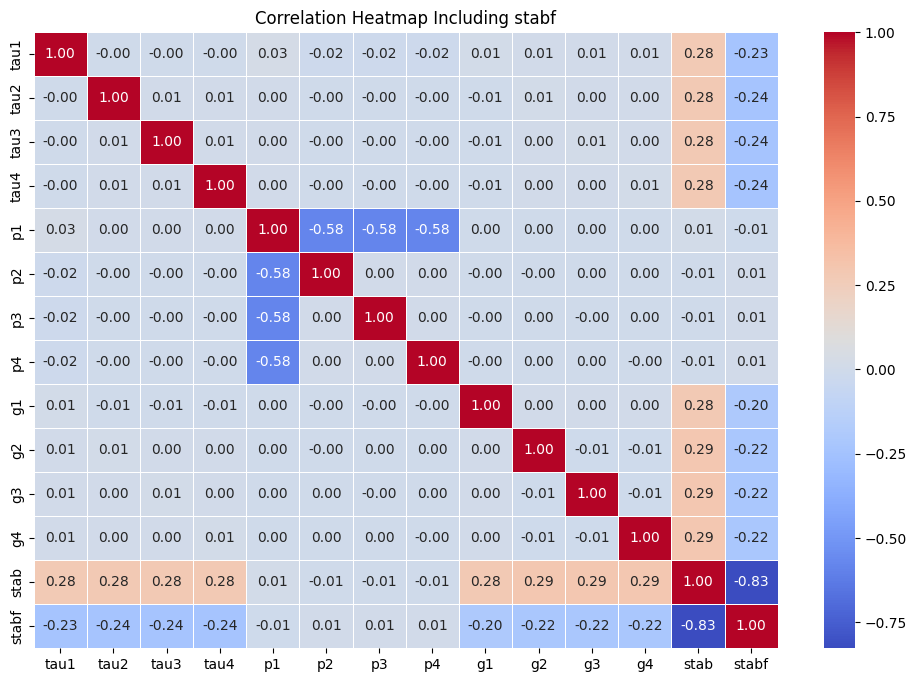

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a file called 'your_data_file.xlsx'
# Replace 'your_data_file.xlsx' with the actual file path
file_path = '/content/drive/MyDrive/Colab Notebooks/Gulfraz+Ali+Irtaza/Gulfraz/smart_grid_stability.xlsx'  # Update with your file path
full_data = pd.read_excel(file_path)  # Load data into 'full_data'

plt.figure(figsize=(12, 8))
# Replace 'stable' and 'unstable' with 1 and 0 respectively in the 'stabf' column
# Handle potential errors during mapping by using 'coerce' in pd.to_numeric directly
# Instead of map, we can apply the dictionary and coerce errors in pd.to_numeric together
full_data['stabf'] = pd.to_numeric(full_data['stabf'].replace({'stable': 1, 'unstable': 0}), errors='coerce').astype('Int64')

# Select numerical columns including stabf
numerical_full_data = full_data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_full_data.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Including stabf')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_selected and y_resampled are available from previous code blocks
# ... (previous code)

# 3. Pairplot (to observe relationships between features and the target)
# Select a subset of features for better readability that are present in X_selected
selected_features_for_pairplot = ['tau1', 'tau2', 'tau3', 'g1', 'g2', 'stab'] # Example subset - Modified to use features present in X_selected

# Create the pairplot
sns.pairplot(data=pd.concat([X_selected[selected_features_for_pairplot], y_resampled], axis=1), hue='stabf', diag_kind='kde') # hue by target variable
plt.show()

KeyboardInterrupt: 

In [ ]:
# Ensure 'stabf' is numeric if not already
# Convert 'stabf' to numeric, handling errors by setting invalid values to NaN
full_data['stabf'] = pd.to_numeric(full_data['stabf'], errors='coerce')

# Fill NaN values with a suitable integer (e.g., -1) or drop rows with NaN
# Option 1: Fill NaN with -1
full_data['stabf'] = full_data['stabf'].fillna(-1).astype(int)

# Option 2: Drop rows with NaN
# full_data.dropna(subset=['stabf'], inplace=True)
# full_data['stabf'] = full_data['stabf'].astype(int)

# Select all features including stabf
all_features = full_data.columns

# Create pairplot with all features
sns.pairplot(full_data[all_features], hue='stabf', palette='viridis', diag_kind='kde', corner=True)
plt.show()

In [ ]:
# 4. Distribution Plots for Numerical Features
numerical_columns = full_data.drop('stabf', axis=1).select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:9]):  # Visualize up to 9 features
    plt.subplot(3, 3, i + 1)
    # Reshape data for histplot using melt
    melted_data = pd.melt(full_data, id_vars=['stabf'], value_vars=[col])
    sns.histplot(data=melted_data, x='value', hue='stabf', palette='viridis', bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# 5. Boxplots (to identify outliers)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:9]):  # Visualize up to 9 features
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='stabf', y=col, data=full_data, palette='viridis')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: write code for feature importance

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_selected and y_resampled are available from previous code blocks
# ... (previous code)


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

# Correlation heatmap for selected features
correlation_matrix = X_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

In [ ]:

# Bar plot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.show()


**Modelling**

In [ ]:
# prompt: please apply 15 machine learning algos for training and testing both
!pip install catboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "MLP": MLPClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), # use_label_encoder=False for newer versions
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),  # Set verbose=0 to suppress output
}

results = {}

for name, model in models.items():
    try:
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test) # Make predictions
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {
            'accuracy': accuracy,
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }
        print(f"{name} - Accuracy: {accuracy:.4f}")
    except Exception as e:
        print(f"Error training {name}: {e}")
        results[name] = {'error': str(e)} # Store error message for the model if any occurs

# Display detailed results for each model
for name, result in results.items():
    print(f"\n--- {name} ---")
    if 'error' in result:
        print(f"Error: {result['error']}")
    else:
        print(f"Accuracy: {result['accuracy']:.4f}")
        print("Classification Report:\n", result['classification_report'])
        print("Confusion Matrix:\n", result['confusion_matrix'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "MLP": MLPClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
}

results = []

for name, model in models.items():
    try:
        model.fit(X_train, y_train)  # Fit the model

        # Training predictions and accuracy
        y_train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # Testing predictions and accuracy
        y_test_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Store results
        results.append({
            'Model': name,
            'Training Accuracy': train_accuracy,
            'Testing Accuracy': test_accuracy,
            'Training Confusion Matrix': confusion_matrix(y_train, y_train_pred),
            'Testing Confusion Matrix': confusion_matrix(y_test, y_test_pred)
        })

        print(f"{name} - Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")

    except Exception as e:
        print(f"Error training {name}: {e}")
        results.append({
            'Model': name,
            'Error': str(e)
        })

# Convert results to DataFrame for easier readability
results_df = pd.DataFrame([{
    'Model': res['Model'],
    'Training Accuracy': res.get('Training Accuracy', 'Error'),
    'Testing Accuracy': res.get('Testing Accuracy', 'Error')
} for res in results])

print("\nModel Performance:")
print(results_df)

# Display confusion matrices for each model
for result in results:
    if 'Error' not in result:
        print(f"\n--- {result['Model']} ---")
        print("Training Confusion Matrix:\n", result['Training Confusion Matrix'])
        print("Testing Confusion Matrix:\n", result['Testing Confusion Matrix'])


In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import ElasticNet
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are defined

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "MLP": MLPClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "Passive Aggressive": PassiveAggressiveClassifier(random_state=42),
    "Perceptron": Perceptron(random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Bagging Classifier": BaggingClassifier(random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(random_state=42),
    "ElasticNet": ElasticNet(random_state=42),
    "Voting Classifier": VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42))
    ], voting='hard'),
    "Stacking Classifier": StackingClassifier(estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('lr', LogisticRegression(random_state=42))
    ], final_estimator=LogisticRegression())
}

results = []

for name, model in models.items():
    try:
        model.fit(X_train, y_train)  # Fit the model

        # Training predictions and accuracy
        y_train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # Testing predictions and accuracy
        y_test_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Store results
        results.append({
            'Model': name,
            'Training Accuracy': train_accuracy,
            'Testing Accuracy': test_accuracy,
            'Training Confusion Matrix': confusion_matrix(y_train, y_train_pred),
            'Testing Confusion Matrix': confusion_matrix(y_test, y_test_pred)
        })

        print(f"{name} - Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")

    except Exception as e:
        print(f"Error training {name}: {e}")
        results.append({
            'Model': name,
            'Error': str(e)
        })

# Convert results to DataFrame for easier readability
results_df = pd.DataFrame([{
    'Model': res['Model'],
    'Training Accuracy': res.get('Training Accuracy', 'Error'),
    'Testing Accuracy': res.get('Testing Accuracy', 'Error')
} for res in results])

print("\nModel Performance:")
print(results_df)

# Display confusion matrices for each model
for result in results:
    if 'Error' not in result:
        print(f"\n--- {result['Model']} ---")
        print("Training Confusion Matrix:\n", result['Training Confusion Matrix'])
        print("Testing Confusion Matrix:\n", result['Testing Confusion Matrix'])


**XAI**

In [ ]:
# prompt: apply LIME approach of explainable AI on MLP Classifier predictions

!pip install lime

import lime
import lime.lime_tabular
import numpy as np # Import numpy

# Assuming 'model' is your trained MLPClassifier and 'X_test' and 'X_train' are your data.
# Replace with your actual model and data.
# Example:
# model = MLPClassifier(random_state=42)
# model.fit(X_train, y_train)

# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), # Now np is defined
    feature_names=X_train.columns,
    class_names=['stable', 'unstable'], # Replace with your class names
    mode='classification'
)

# Choose an instance from the test set to explain
instance_idx = 0  # Example index, you can change this
instance = X_test.iloc[instance_idx]

# Explain the prediction for the chosen instance
explanation = explainer.explain_instance(
    data_row=np.array(instance),
    predict_fn=model.predict_proba, # Use predict_proba for probabilities
    num_features=len(X_train.columns) # Display all features
)

# Display the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

# You can also access the explanation details programmatically:
print("Explanation for instance:", instance_idx)
print("Predicted Class:", model.predict(instance.to_frame().T)[0])
print("Probabilities:", model.predict_proba(instance.to_frame().T)[0])
for feature, weight in explanation.as_list():
    print(f"{feature}: {weight}")